Import data and print shape

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl

%matplotlib inline

data = pd.read_csv("StudentsPerformance.csv")
data.shape

(1000, 8)

Print first 5 rows of data

In [18]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


For each object print number of unique values

In [19]:
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

Calculate missing data


In [20]:
data.isnull().sum()/data.shape[0]

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

Calculate descriptive statistics for valid objects

In [21]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Comparision of all other attributes w.r.t math score

Target looks like regression


[<AxesSubplot: title={'center': 'Target distribution'}, xlabel='math score', ylabel='frequency'>,
 array([[<AxesSubplot: title={'center': 'F=8.04E-01'}, xlabel='reading score', ylabel='math score'>,
         <AxesSubplot: title={'center': 'F=7.78E-01'}, xlabel='writing score'>]],
       dtype=object),
 array([[<AxesSubplot: title={'center': 'F=6.88E-02'}, xlabel='math score', ylabel='gender'>,
         <AxesSubplot: title={'center': 'F=1.94E-02'}, xlabel='math score', ylabel='race/ethnicity'>,
         <AxesSubplot: title={'center': 'F=8.46E-03'}, xlabel='math score', ylabel='parental level of education'>,
         <AxesSubplot: title={'center': 'F=1.19E-03'}, xlabel='math score', ylabel='lunch'>,
         <AxesSubplot: title={'center': 'F=0.00E+00'}, xlabel='math score', ylabel='test preparation course'>]],
       dtype=object)]

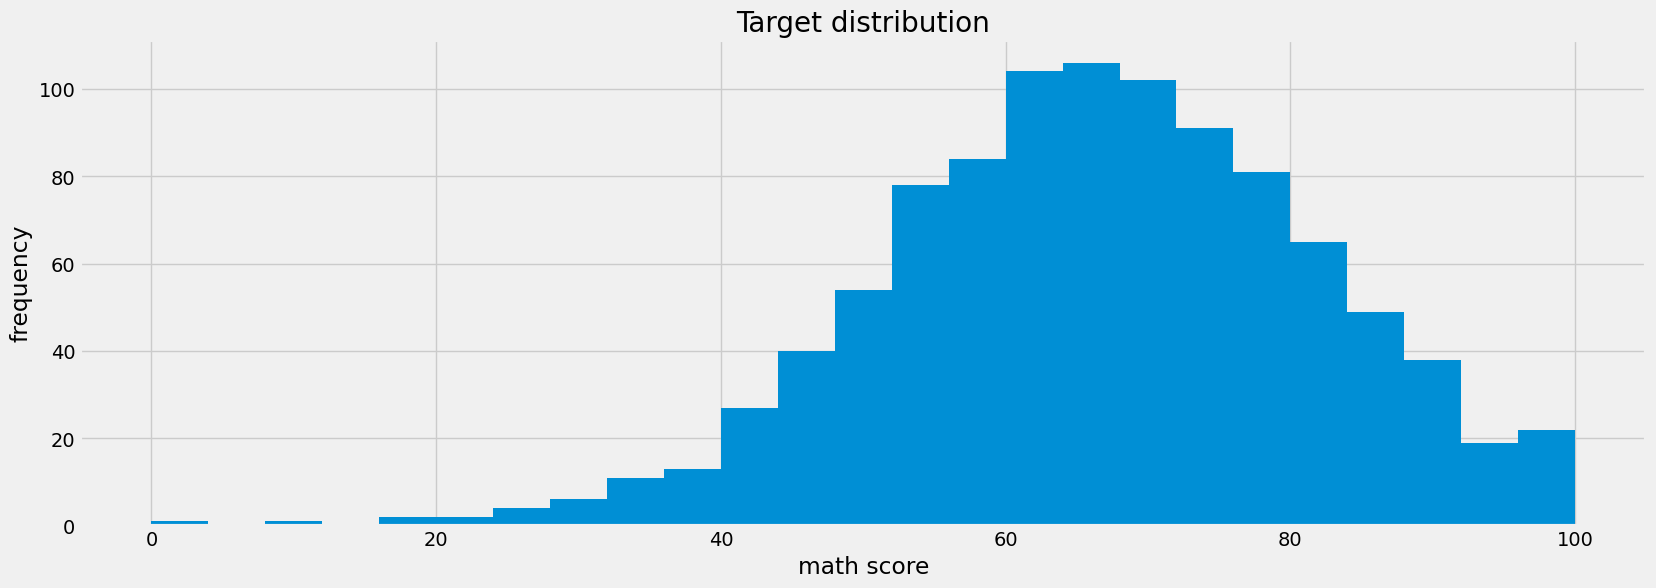

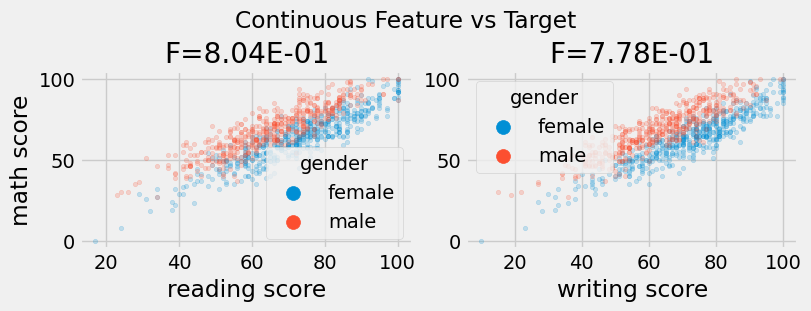

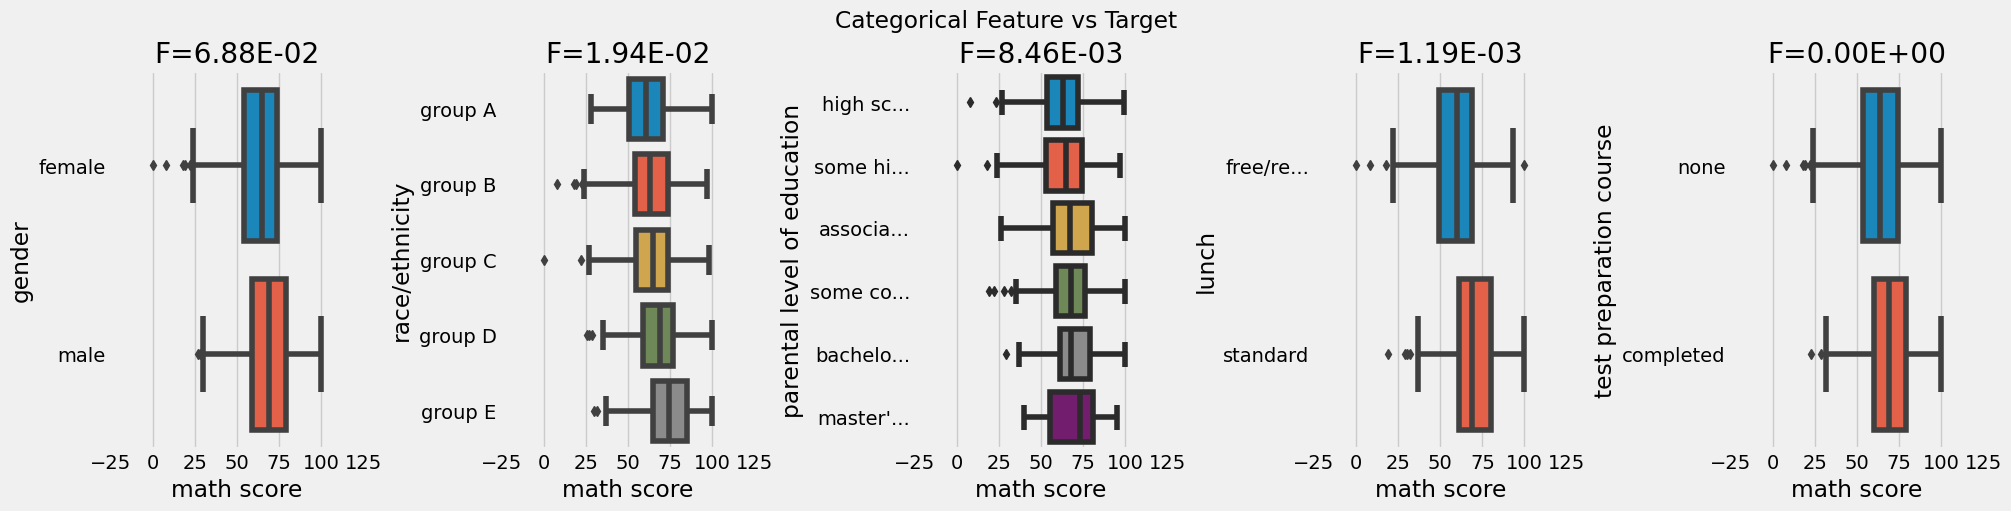

In [22]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'math score')

Comparison of all other attributes w.r.t reading score

Target looks like regression


[<AxesSubplot: title={'center': 'Target distribution'}, xlabel='reading score', ylabel='frequency'>,
 array([[<AxesSubplot: title={'center': 'F=9.49E-01'}, xlabel='writing score', ylabel='reading score'>,
         <AxesSubplot: title={'center': 'F=8.04E-01'}, xlabel='math score'>]],
       dtype=object),
 array([[<AxesSubplot: title={'center': 'F=3.51E-02'}, xlabel='reading score', ylabel='gender'>,
         <AxesSubplot: title={'center': 'F=2.96E-02'}, xlabel='reading score', ylabel='race/ethnicity'>,
         <AxesSubplot: title={'center': 'F=2.71E-02'}, xlabel='reading score', ylabel='parental level of education'>,
         <AxesSubplot: title={'center': 'F=2.41E-02'}, xlabel='reading score', ylabel='lunch'>,
         <AxesSubplot: title={'center': 'F=2.13E-02'}, xlabel='reading score', ylabel='test preparation course'>]],
       dtype=object)]

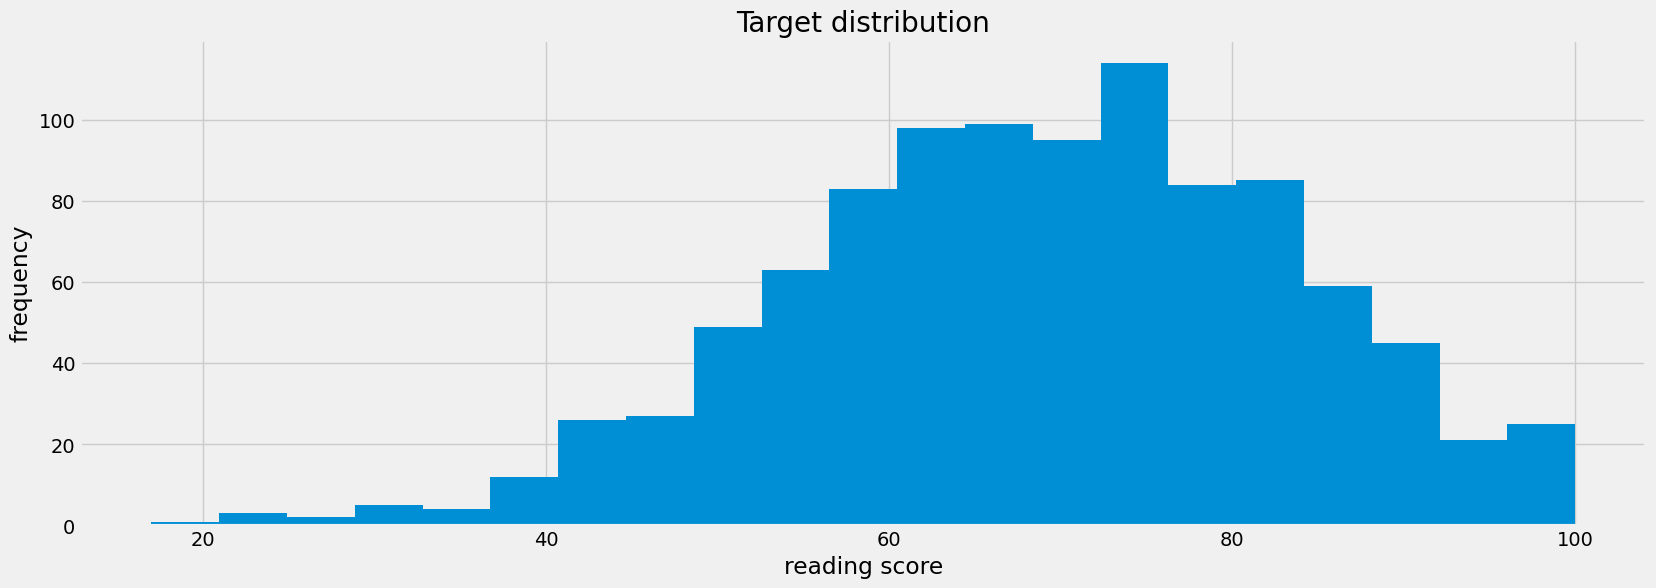

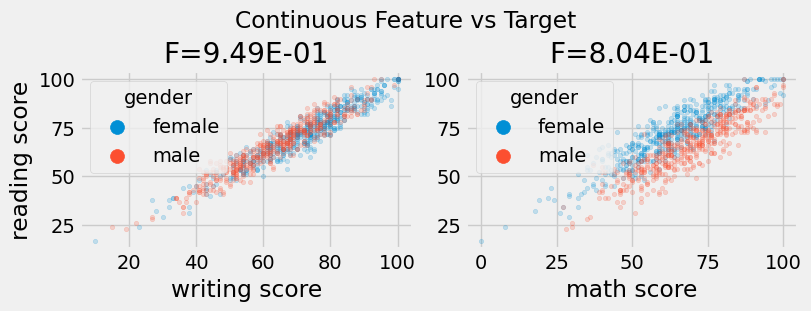

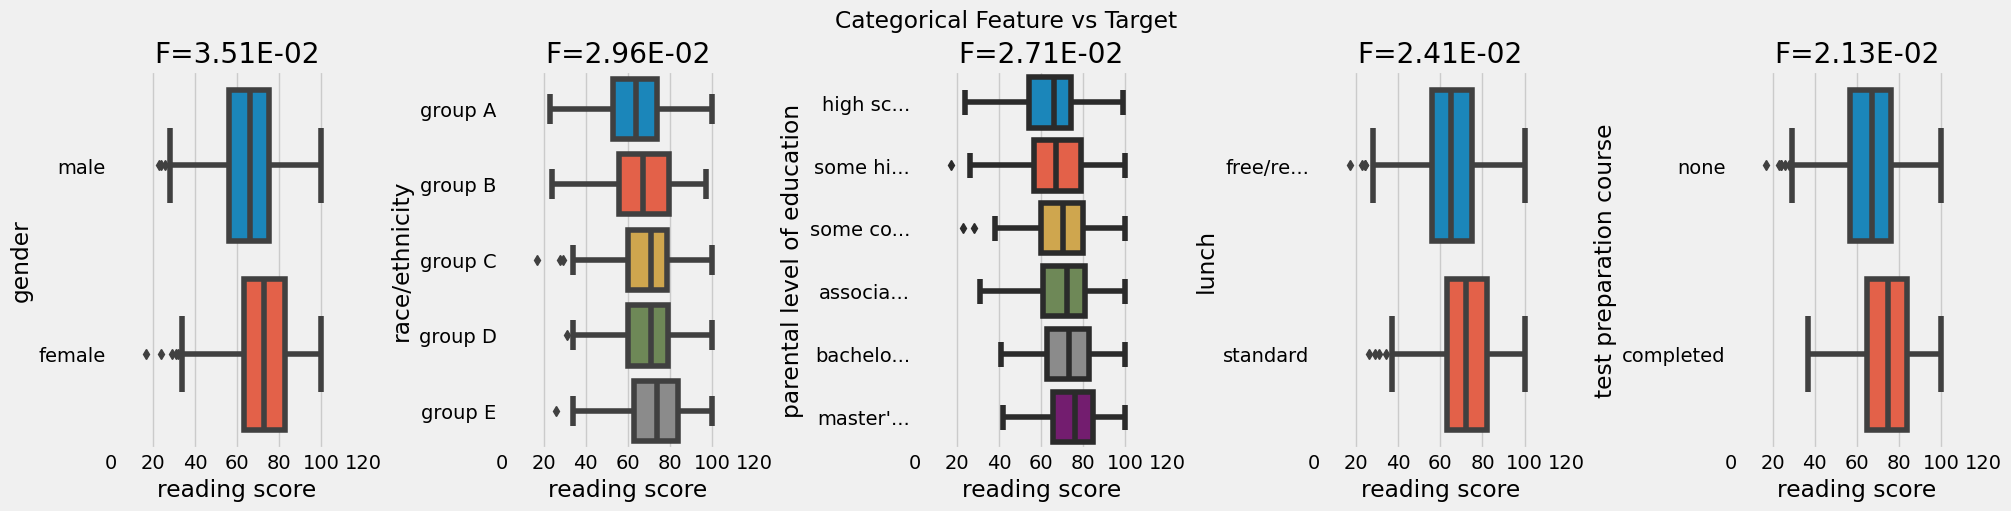

In [23]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'reading score')

Check effect of lunch on student's performance

In [24]:
data[['lunch','gender','math score','writing score',
      'reading score']].groupby(['lunch','gender']).agg('mean')

math score  writing score  reading score
lunch        gender                                          
free/reduced female   55.814815      66.444444      67.386243
             male     62.457831      59.126506      61.542169
standard     female   68.124620      75.927052      75.607903
             male     72.022152      65.509494      67.537975

In [25]:
data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('mean')

math score  writing score  reading score
test preparation course gender                                          
completed               female   67.195652      78.793478      77.375000
                        male     72.339080      69.793103      70.212644
none                    female   61.670659      68.982036      69.982036
                        male     66.688312      59.649351      62.795455

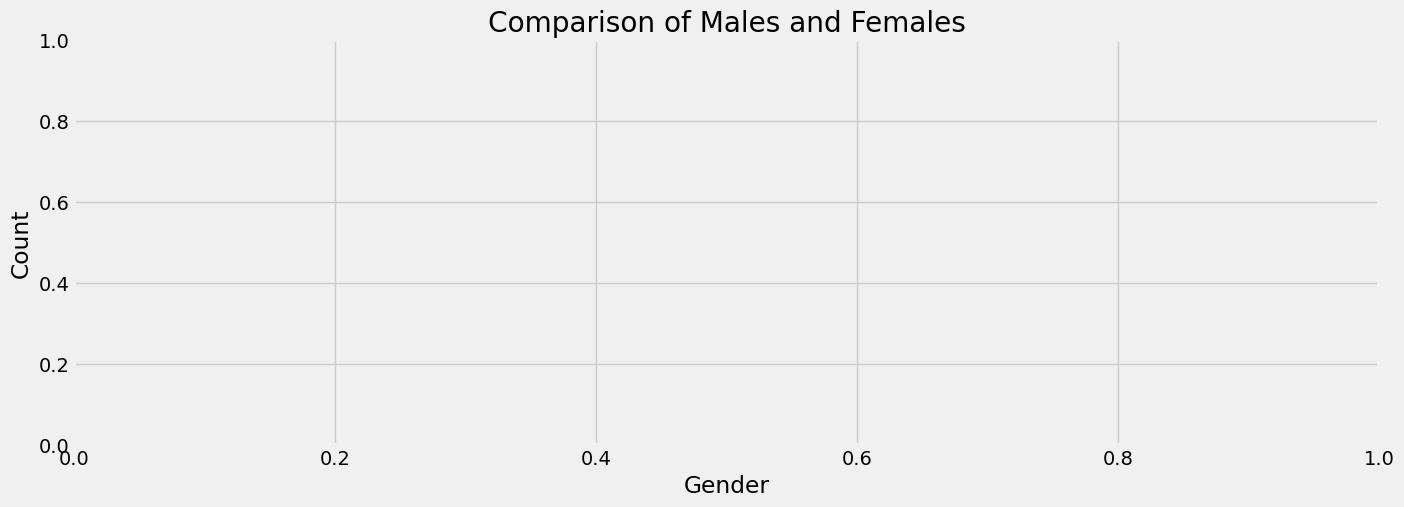

In [27]:
plt.rcParams['figure.figsize'] = (15, 5)
# sns.countplot(data['gender'], palette = 'bone')
plt.title('Comparison of Males and Females', fontweight = 30)
# plt.scatter(data['gender'], data['math score'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()